In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
survey_path = "output data/HHS_COVID-19_Monthly_Outcome_Survey_-_Wave_11-2.csv"
# Read the mouse data and the study results
covid19_metadata = pd.read_csv(survey_path)
covid19_metadata

,public_id,CAM5_VaccUptake,CAM5a_VaccLike,CAM6_VaccWait,CAM7_VaccBel_1,CAM7_VaccBel_2,CAM7_VaccBel_3,CAM7_VaccBel_5,CAM7_VaccBel_6,Child_Age_04,...,parent,xurbanicity,agecat,ppeducat,ppgender,income,ppreg4,race,politicalideo,Weights
0,10016839,2,-100,-100,5,1,1,1,1,0,...,0,3,3,3,1,4,2,2,3,0.960202
1,10016983,0,1,60,1,5,3,5,5,0,...,0,1,3,3,1,4,4,3,1,1.984764
2,10051722,2,-100,-100,4,3,2,4,3,0,...,0,3,2,1,1,2,2,2,3,2.118742
3,10071608,2,-100,-100,2,5,4,5,2,0,...,0,3,4,2,2,6,1,2,3,1.016854
4,10094375,2,-100,-100,5,1,1,1,1,0,...,0,3,5,3,2,3,3,2,2,0.651796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5024,99831664,2,-100,-100,5,1,1,1,1,0,...,0,3,5,4,1,7,2,2,4,0.501408
5025,99904583,2,-100,-100,4,2,2,3,2,0,...,0,3,4,2,1,5,3,2,3,0.863215
5026,99944355,2,-100,-100,3,2,3,4,4,-99,...,-99,1,3,4,2,6,4,5,3,0.863765
5027,99960227,2,-100,-100,5,1,1,2,2,0,...,0,1,4,4,2,4,3,1,3,0.681932


In [3]:
# Define a dictionary 
vaccine = {
    -99: 'Refused',
    0: 'No, I have not received the COVID-19 vaccine',
    1: 'Yes, but I have only received one shot out of the two required shots',
    2: 'Yes, I have received all the required shots'
}


covid19_metadata['CAM5_VaccUptake'] = covid19_metadata['CAM5_VaccUptake'].replace(vaccine)

covid19_metadata.head()

,public_id,CAM5_VaccUptake,CAM5a_VaccLike,CAM6_VaccWait,CAM7_VaccBel_1,CAM7_VaccBel_2,CAM7_VaccBel_3,CAM7_VaccBel_5,CAM7_VaccBel_6,Child_Age_04,...,parent,xurbanicity,agecat,ppeducat,ppgender,income,ppreg4,race,politicalideo,Weights
0,10016839,"Yes, I have received all the required shots",-100,-100,5,1,1,1,1,0,...,0,3,3,3,1,4,2,2,3,0.960202
1,10016983,"No, I have not received the COVID-19 vaccine",1,60,1,5,3,5,5,0,...,0,1,3,3,1,4,4,3,1,1.984764
2,10051722,"Yes, I have received all the required shots",-100,-100,4,3,2,4,3,0,...,0,3,2,1,1,2,2,2,3,2.118742
3,10071608,"Yes, I have received all the required shots",-100,-100,2,5,4,5,2,0,...,0,3,4,2,2,6,1,2,3,1.016854
4,10094375,"Yes, I have received all the required shots",-100,-100,5,1,1,1,1,0,...,0,3,5,3,2,3,3,2,2,0.651796


In [4]:
vaccine_uptake_by_age = covid19_metadata.groupby('agecat')['CAM5_VaccUptake'].value_counts(normalize=True) * 100
vaccine_uptake_by_age

agecat  CAM5_VaccUptake                                                     
2       Yes, I have received all the required shots                             72.413793
        No, I have not received the COVID-19 vaccine                            25.287356
        Yes, but I have only received one shot out of the two required shots     2.298851
3       Yes, I have received all the required shots                             72.895863
        No, I have not received the COVID-19 vaccine                            24.322397
        Yes, but I have only received one shot out of the two required shots     2.710414
        Refused                                                                  0.071327
4       Yes, I have received all the required shots                             80.726108
        No, I have not received the COVID-19 vaccine                            17.084891
        Yes, but I have only received one shot out of the two required shots     1.922050
        Refused        

<Figure size 1000x600 with 0 Axes>

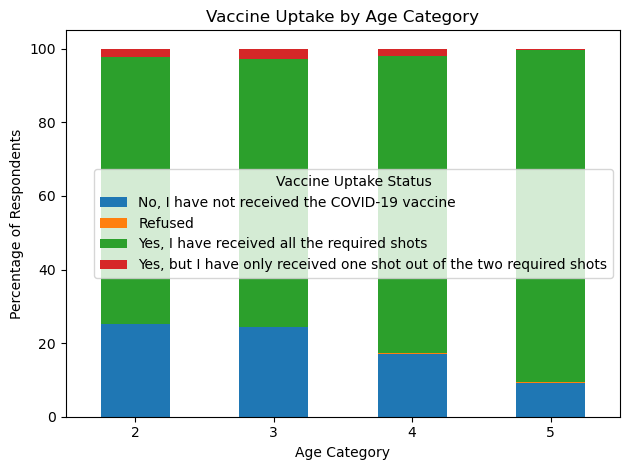

In [5]:
# Plot vaccine uptake percentages by age category
plt.figure(figsize=(10, 6))
vaccine_uptake_by_age.unstack().plot(kind='bar', stacked=True)
plt.title('Vaccine Uptake by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Percentage of Respondents')
plt.xticks(rotation=0)
plt.legend(title='Vaccine Uptake Status',loc="best")
plt.tight_layout()
plt.show()

In [6]:
vaccine_uptake_by_gender = covid19_metadata.groupby('ppgender')['CAM5_VaccUptake'].value_counts(normalize=True) * 100
vaccine_uptake_by_gender

ppgender  CAM5_VaccUptake                                                     
1         Yes, I have received all the required shots                             81.923848
          No, I have not received the COVID-19 vaccine                            16.192385
          Yes, but I have only received one shot out of the two required shots     1.763527
          Refused                                                                  0.120240
2         Yes, I have received all the required shots                             80.702447
          No, I have not received the COVID-19 vaccine                            17.561168
          Yes, but I have only received one shot out of the two required shots     1.499605
          Refused                                                                  0.236780
Name: CAM5_VaccUptake, dtype: float64

<Figure size 1000x600 with 0 Axes>

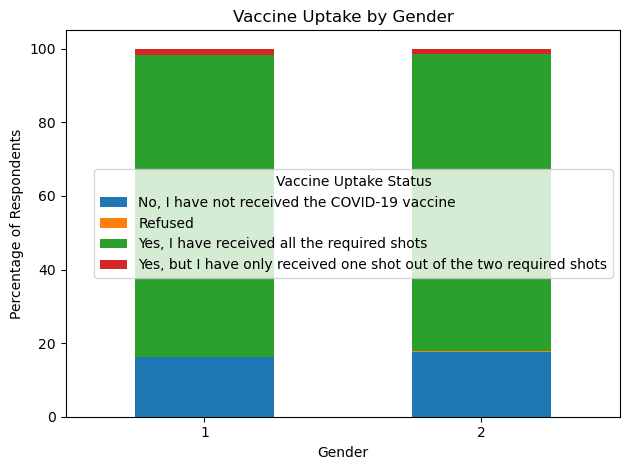

In [7]:
# Plot vaccine uptake percentages by age category
plt.figure(figsize=(10, 6))
vaccine_uptake_by_gender.unstack().plot(kind='bar', stacked=True)
plt.title('Vaccine Uptake by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage of Respondents')
plt.xticks(rotation=0)
plt.legend(title='Vaccine Uptake Status',loc="best")
plt.tight_layout()
plt.show()